# LTS Curve Fit

In [121]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

In [122]:
data = np.genfromtxt('C:/Users/zumst/git/LTS/LTS_SaschaZumstein_Test/LTS_CurveData.csv', delimiter=';', skip_header=1)
z_mess = data[:,0] # distance
cog_mess = data[:,1] # center of Gravit

In [123]:
def objective_function(x, cog, z):
    a, b, c = x
    z_est = (a+b*cog)/(1+c*cog)
    return z_est - z

In [124]:
x0 = [1.0, 1.0, 1.0]
result = least_squares(objective_function, x0, args=(cog_mess, z_mess))
print(result)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.496e-02 -1.441e-01 ...  6.676e-02 -8.887e-02]
           x: [ 2.826e+02  5.844e-03 -7.144e-04]
        cost: 1.0295553415600158
         jac: [[ 1.060e+00  8.373e+01 -2.512e+04]
               [ 1.231e+00  3.238e+02 -1.133e+05]
               ...
               [ 3.296e+00  3.213e+03 -3.053e+06]
               [ 3.467e+00  3.453e+03 -3.453e+06]]
        grad: [-2.369e-08 -4.470e-05  3.597e-02]
  optimality: 0.03596755908802152
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 30
        njev: 24


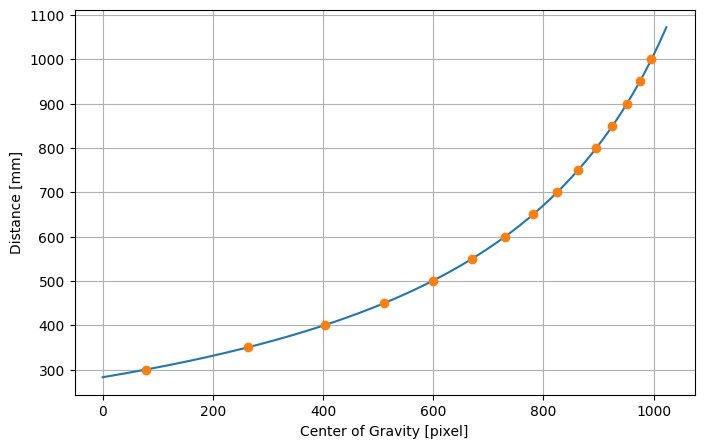

In [125]:
cog_calc = np.linspace(0, 1023, 1024)
z_calc = objective_function(result.x, cog_calc, 0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cog_calc, z_calc)
ax.plot(cog_mess, z_mess, 'o')
ax.set_xlabel('Center of Gravity [pixel]')
ax.set_ylabel('Distance [mm]')
ax.grid()

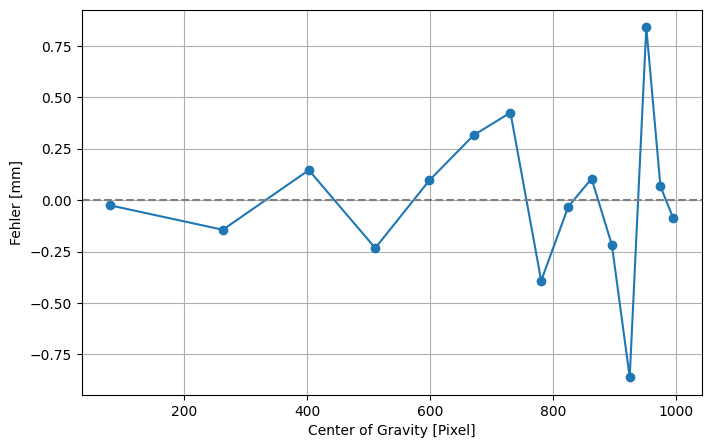

In [126]:
residuals = objective_function(result.x, cog_mess, 0) - np.array(z_mess)

# Plot
fig, ax = plt.subplots()
ax.plot(cog_mess, residuals, 'o-')
ax.axhline(0, color='gray', linestyle='--')
ax.set_xlabel('Center of Gravity [Pixel]')
ax.set_ylabel('Fehler [mm]')
ax.grid()